In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [16]:
import yfinance as yf

# Replace 'AAPL' with the symbol of another company
company = '^NSEI'
start = '2015-01-01'
end = '2020-01-01'

data = yf.download(company, start=start, end=end)
data.rename(columns={'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace= True)
data


[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,Adj Close,volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800
...,...,...,...,...,...,...
2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300
2019-12-26,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,520300
2019-12-27,12172.900391,12258.450195,12157.900391,12245.799805,12245.799805,383800


In [17]:
# data=pd.read_csv('Dec_Feb_ISO.csv')
# data=pd.DataFrame(data)
# # data=data['time','open','high','low,','close']

# selected_columns = ['time','open','high','low','close']

# data = data[selected_columns]
# data 

# We are only concerned about the OHLC and volume here


In [18]:
%pip install pandas_ta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Prepare Data
import pandas_ta as pa

help(pa.dm)

Help on function dm in module pandas_ta.momentum.dm:

dm(high, low, length=None, mamode=None, talib=None, drift=None, offset=None, **kwargs)
    Directional Movement (DM)
    
    The Directional Movement was developed by J. Welles Wilder in 1978 attempts to
    determine which direction the price of an asset is moving. It compares prior
    highs and lows to yield to two series +DM and -DM.
    
    Sources:
        https://www.tradingview.com/pine-script-reference/#fun_dmi
        https://www.sierrachart.com/index.php?page=doc/StudiesReference.php&ID=24&Name=Directional_Movement_Index
    
    Calculation:
        Default Inputs:
            length=14, mamode="rma", drift=1
                up = high - high.shift(drift)
            dn = low.shift(drift) - low
    
            pos_ = ((up > dn) & (up > 0)) * up
            neg_ = ((dn > up) & (dn > 0)) * dn
    
            pos_ = pos_.apply(zero)
            neg_ = neg_.apply(zero)
    
            # Not the same values as TA Lib's -+

In [20]:
df=data

df['RSI'] = pa.rsi(df.close, length=16)
df['CCI'] = pa.cci(df.high, df.low, df.close, length=16)
df['AO'] = pa.ao(df.high,df.low)
df['MOM'] = pa.mom(df.close,length=16)

a = pa.macd(df.close)
df = df.join(a)

df['ATR'] = pa.atr(df.high, df.low,df.close, length=16)
df['BOP'] = pa.bop(df.open, df.high, df.low, df.close, length=16)
df['RVI'] = pa.rvi(df.close)

a = pa.dm(df.high, df.low, length=16)
df = df.join(a)

a = pa.stoch(df.high, df.low, df.close)
df = df.join(a)

a = pa.stochrsi(df.close, length=16)
df = df.join(a)

df["WPR"] = pa.willr(df.high, df.low, df.close, length=16)


In [21]:
df

,open,high,low,close,Adj Close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900,NaN,NaN,NaN,NaN,...,NaN,0.875722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200,NaN,NaN,NaN,NaN,...,NaN,-0.361690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800,NaN,NaN,NaN,NaN,...,NaN,-0.914319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100,NaN,NaN,NaN,NaN,...,NaN,-0.193001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800,NaN,NaN,NaN,NaN,...,NaN,0.566924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300,62.071537,93.668239,215.833869,166.349609,...,101.057537,-0.670341,51.261064,27.924891,16.983204,90.424509,94.113709,90.623885,93.072524,-17.190313
2019-12-26,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,520300,56.068696,41.985749,202.593345,132.349609,...,101.160203,-0.830571,42.364715,26.179586,21.124879,79.935643,88.617857,71.411676,86.050378,-36.254414
2019-12-27,12172.900391,12258.450195,12157.900391,12245.799805,12245.799805,383800,61.456589,69.603829,191.688689,202.599609,...,103.081465,0.725008,51.814667,26.849636,19.804574,78.711627,83.023927,63.479206,75.171589,-10.420391


In [22]:
# clear NA values

df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

open                   0
high                   0
low                    0
close                  0
Adj Close              0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [23]:
# Reset the index
df.reset_index(inplace=True, drop=True)
df.tail()

,open,high,low,close,Adj Close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
1184,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300,62.071537,93.668239,215.833869,166.349609,...,101.057537,-0.670341,51.261064,27.924891,16.983204,90.424509,94.113709,90.623885,93.072524,-17.190313
1185,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,520300,56.068696,41.985749,202.593345,132.349609,...,101.160203,-0.830571,42.364715,26.179586,21.124879,79.935643,88.617857,71.411676,86.050378,-36.254414
1186,12172.900391,12258.450195,12157.900391,12245.799805,12245.799805,383800,61.456589,69.603829,191.688689,202.599609,...,103.081465,0.725008,51.814667,26.849636,19.804574,78.711627,83.023927,63.479206,75.171589,-10.420391
1187,12274.900391,12286.450195,12213.799805,12255.849609,12255.849609,411100,61.876891,76.838908,178.558215,237.449219,...,101.179523,-0.262225,59.266529,26.921534,18.566788,81.693990,80.113753,63.124733,66.005205,-8.243226
1188,12247.099609,12247.099609,12151.799805,12168.450195,12168.450195,426900,56.192678,37.457825,159.403722,246.950195,...,101.358916,-0.825284,51.701651,25.238938,21.281364,84.719722,81.708446,63.460615,63.354851,-27.177218


In [24]:
#Target flexible way
# Calculates if the trend is an uptrend of a downtrend
pipdiff = 200*1e-4 #for TP
pipdiff = 100 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

open                   0
high                   0
low                    0
close                  0
Adj Close              0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
Target                 0
dtype: int64

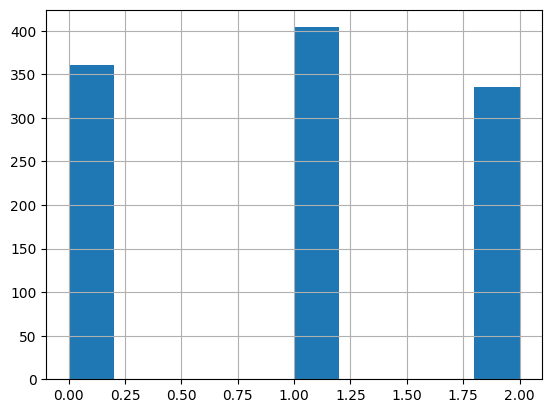

In [36]:
df['Target']=mytarget(20,df)
df['Target'].hist()
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()
# df

In [33]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,open,high,low,close,Adj Close,volume,RSI,CCI,AO,MOM,...,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,Target
1118,10994.849609,11052.700195,10968.200195,11003.500000,11003.500000,434500,47.997895,50.190975,11.617963,84.799805,...,0.102371,60.929800,24.892900,35.780967,73.495102,74.990498,90.291412,93.394059,-27.397960,1.0
1119,11000.099609,11000.099609,10796.500000,10817.599609,10817.599609,482000,41.658189,-69.507517,11.238724,76.250000,...,-0.896367,53.501953,23.337093,44.275919,56.668426,69.435981,71.295683,85.778785,-64.239128,1.0
1120,10872.799805,10885.150391,10804.849609,10840.650391,10840.650391,519200,42.659893,-104.704579,-14.234981,11.300781,...,-0.400362,59.026507,21.878525,41.508674,35.885815,55.349781,46.507766,69.364954,-76.150559,1.0
1121,10845.200195,10845.200195,10670.250000,10704.799805,10704.799805,642600,38.503951,-156.285003,-53.420269,-353.049805,...,-0.802516,50.982691,20.511117,47.326857,16.987777,36.514006,18.632281,45.478577,-92.672364,0.0
1122,10746.799805,11381.900391,10691.000000,11274.200195,11274.200195,1356800,57.161930,133.164783,-45.220835,168.850586,...,0.763352,59.423555,52.772935,44.368929,39.269920,30.714504,41.878750,35.672932,-15.133863,0.0


In [34]:
! pip install xgboost


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR'] # All the indicators Are here


# attributes = ['RSI', 'CCI', 'BOP', 'STOCHRSIk_16_14_3_3', 'WPR']

X = df[attributes]
y = df['Target']

train_pct_index = int(0.6 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 33.7778%


In [ ]:
import joblib
from xgboost import XGBRegressor

joblib.dump(model, 'xgb_model.pkl')


['xgb_model.pkl']

In [ ]:
X_test

,RSI,CCI,BOP,STOCHRSIk_16_14_3_3,WPR
1327,74.937097,137.571804,0.614928,82.359265,-8.059361
1328,76.563639,148.574454,0.216399,89.157122,-3.988340
1329,72.154098,119.931561,-0.655113,85.535038,-16.093018
1330,64.095067,60.065457,-0.814230,54.292874,-35.916509
1331,67.138816,63.417185,0.665138,29.089527,-20.662018
...,...,...,...,...,...
1891,59.783809,-5.503586,-0.625291,30.349118,-52.638114
1892,65.967804,163.859146,0.918360,31.165432,-3.814091
1893,63.607557,177.323377,-0.574938,31.514506,-28.729550
1894,65.882984,167.818194,0.538915,50.573829,-9.627052


### Predicting the Furthure Data


In [ ]:
company = '^NSEI'

start = '2020-01-01'
end = '2022-01-01'

new_data = yf.download(company, start=start, end=end)
new_data.rename(columns={'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace= True)
new_data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,Adj Close,volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800
...,...,...,...,...,...,...
2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800
2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000
2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700


### NP Hard Approch For Getting Best Attributes

In [ ]:
# ## DO NOT RUNN
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from itertools import combinations

# def find_best_attributes(attributes, current_set, best_set, best_accuracy, X_train, X_test, y_train, y_test):
#     # Base case: check accuracy and update best set if needed
#     if len(current_set) > 0:
#         model = XGBClassifier()
#         model.fit(X_train[current_set], y_train)
#         pred_test = model.predict(X_test[current_set])
#         acc_test = accuracy_score(y_test, pred_test)
        
#         if acc_test > best_accuracy[0]:
#             best_accuracy[0] = acc_test
#             best_set[0] = current_set.copy()

#     # Recursive case: try adding each attribute and recurse
#     for attribute in attributes:
#         if attribute not in current_set:
#             find_best_attributes(attributes, current_set + [attribute], best_set, best_accuracy, X_train, X_test, y_train, y_test)

# # Assuming df is your DataFrame containing both X and y
# attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
#                'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
#                'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

# # Split your data into train and test sets
# train_pct_index = int(0.7 * len(df))
# X_train, X_test = df[attributes][:train_pct_index], df[attributes][train_pct_index:]
# y_train, y_test = df['Target'][:train_pct_index], df['Target'][train_pct_index:]

# best_set = [None]  # List to store the best set of attributes
# best_accuracy = [0.0]  # List to store the best accuracy

# # Start the recursive search
# find_best_attributes(attributes, [], best_set, best_accuracy, X_train, X_test, y_train, y_test)

# # Print the results
# print('Best Attribute Set:', best_set[0])
# print('Best Accuracy:', best_accuracy[0])


### Find best attributes according to the datasets

In [ ]:
# # Find best attributes using inbuilt functions
# from xgboost import XGBClassifier
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
#               'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
#               'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

# X = df[attributes]
# y = df['Target']

# train_pct_index = int(0.7 * len(X))
# X_train, X_test = X[:train_pct_index], X[train_pct_index:]
# y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# # Define the XGBoost model
# model = XGBClassifier()

# # Sequential Feature Selector
# sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', cv=5)

# # Fit on the training data
# sfs.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[sfs.get_support()]

# # Print the selected features
# print('Selected Features:', selected_features)

# # Train the model on the selected features
# model.fit(X_train[selected_features], y_train)

# # Make predictions
# pred_train = model.predict(X_train[selected_features])
# pred_test = model.predict(X_test[selected_features])

# # Evaluate the model
# acc_train = accuracy_score(y_train, pred_train)
# acc_test = accuracy_score(y_test, pred_test)
# print('****Train Results****')
# print("Accuracy: {:.4%}".format(acc_train))
# print('****Test Results****')
# print("Accuracy: {:.4%}".format(acc_test))


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[11774     0     0]
 [  962   328     0]
 [  965     2   367]]
[[4979   11   23]
 [ 552    0    1]
 [ 598    1    7]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     11774
         1.0       0.99      0.25      0.40      1290
         2.0       1.00      0.28      0.43      1334

    accuracy                           0.87     14398
   macro avg       0.95      0.51      0.59     14398
weighted avg       0.88      0.87      0.83     14398

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      5013
         1.0       0.00      0.00      0.00       553
         2.0       0.23      0.01      0.02       606

    accuracy                           0.81      6172
   macro avg       0.35      0.33      0.31      6172
weighted avg       0.68      0.81      0.73      6172

['RSI', 'CCI', 'BOP', 'STOCHRSIk_16_14_3_3', 'WPR']


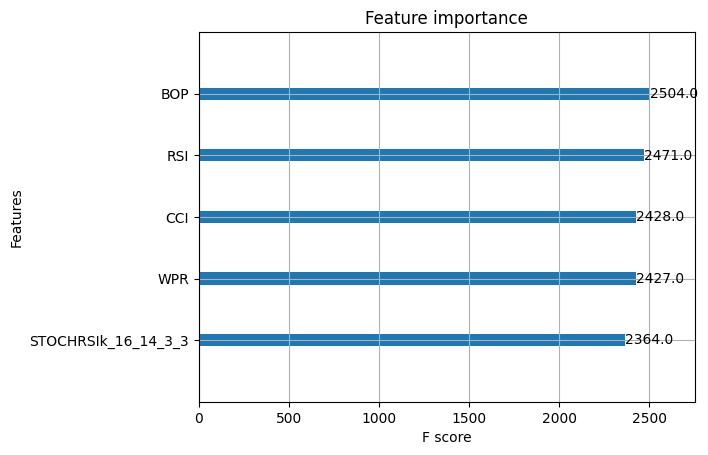

['RSI', 'CCI', 'BOP', 'STOCHRSIk_16_14_3_3', 'WPR']


In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from itertools import combinations

# def find_best_attributes(attributes, current_set, best_set, best_accuracy, X_train, X_test, y_train, y_test):
#     # Base case: check accuracy and update best set if needed
#     if len(current_set) > 0:
#         model = XGBClassifier()
#         model.fit(X_train[current_set], y_train)
#         pred_test = model.predict(X_test[current_set])
#         acc_test = accuracy_score(y_test, pred_test)
        
#         if acc_test > best_accuracy[0]:
#             best_accuracy[0] = acc_test
#             best_set[0] = current_set.copy()
#         print('Current Best Attribute Set:', best_set[0])
#         print('Current Best Accuracy:', best_accuracy[0])

#     # Recursive case: try adding each attribute and recurse
#     for attribute in attributes:
#         if attribute not in current_set:
#             find_best_attributes(attributes, current_set + [attribute], best_set, best_accuracy, X_train, X_test, y_train, y_test)

# # Assuming df is your DataFrame containing both X and y
# attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
#                'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
#                'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

# # Split your data into train and test sets
# train_pct_index = int(0.7 * len(df))
# X_train, X_test = df[attributes][:train_pct_index], df[attributes][train_pct_index:]
# y_train, y_test = df['Target'][:train_pct_index], df['Target'][train_pct_index:]

# best_set = [None]  # List to store the best set of attributes
# best_accuracy = [0.0]  # List to store the best accuracy

# # Start the recursive search
# find_best_attributes(attributes, [], best_set, best_accuracy, X_train, X_test, y_train, y_test)

# # Print the final results
# print('Best Attribute Set:', best_set[0])
# print('Best Accuracy:', best_accuracy[0])
